In [185]:
# from google.colab import files
# uploaded = files.upload()

In [186]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
df = pd.read_csv('spotify.csv')

Visualizations

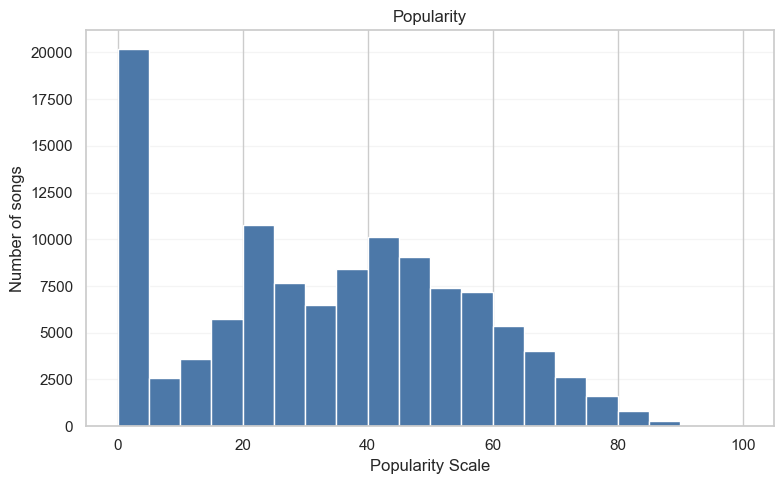

In [187]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df['popularity'].dropna(), bins=20, color='#4C78A8', edgecolor='white')
plt.title('Popularity')
plt.xlabel('Popularity Scale')
plt.ylabel('Number of songs')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

In [188]:
df = df.loc[df['popularity'] >= 5]

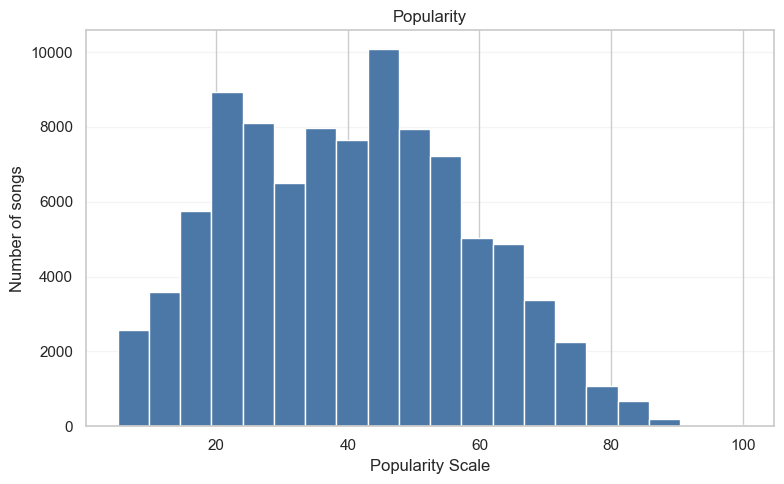

In [189]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df['popularity'].dropna(), bins=20, color='#4C78A8', edgecolor='white')
plt.title('Popularity')
plt.xlabel('Popularity Scale')
plt.ylabel('Number of songs')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

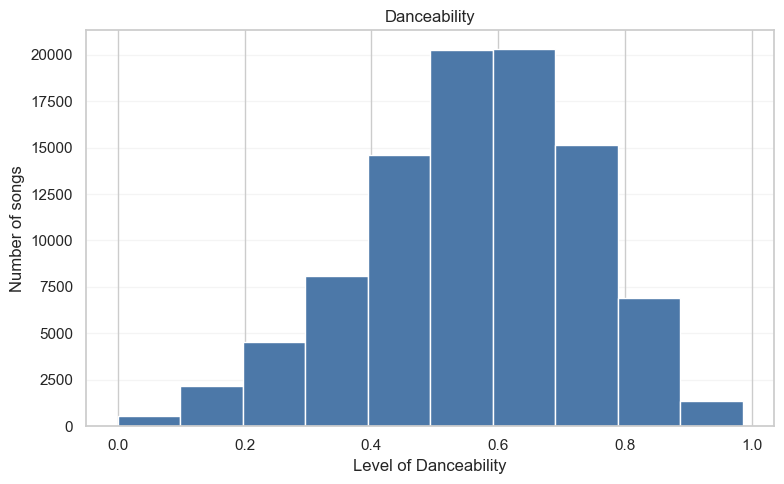

In [190]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df['danceability'].dropna(), bins=10, color='#4C78A8', edgecolor='white')
plt.title('Danceability')
plt.xlabel('Level of Danceability')
plt.ylabel('Number of songs')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

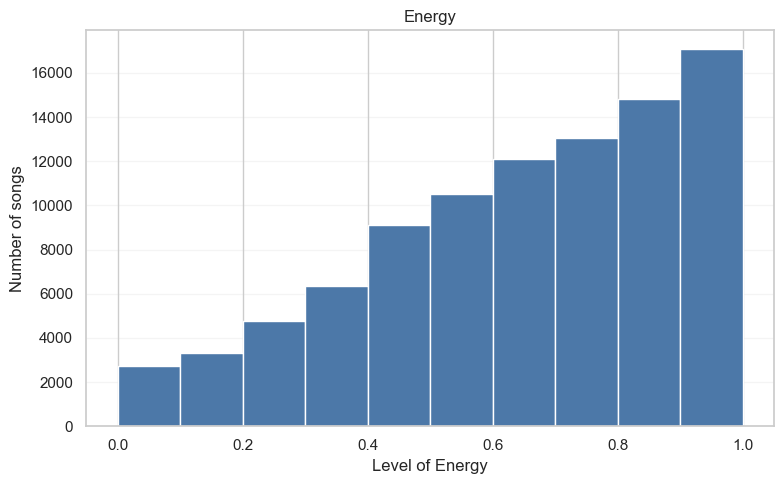

In [191]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df['energy'].dropna(), bins=10, color='#4C78A8', edgecolor='white')
plt.title('Energy')
plt.xlabel('Level of Energy')
plt.ylabel('Number of songs')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

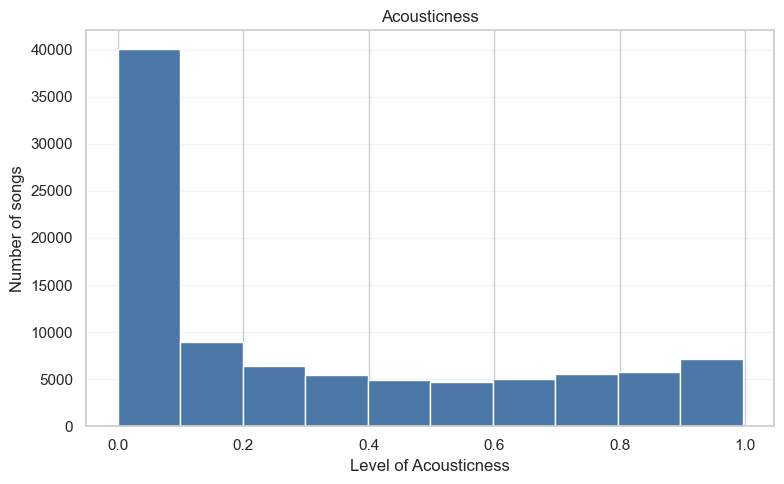

In [192]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df['acousticness'].dropna(), bins=10, color='#4C78A8', edgecolor='white')
plt.title('Acousticness')
plt.xlabel('Level of Acousticness')
plt.ylabel('Number of songs')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

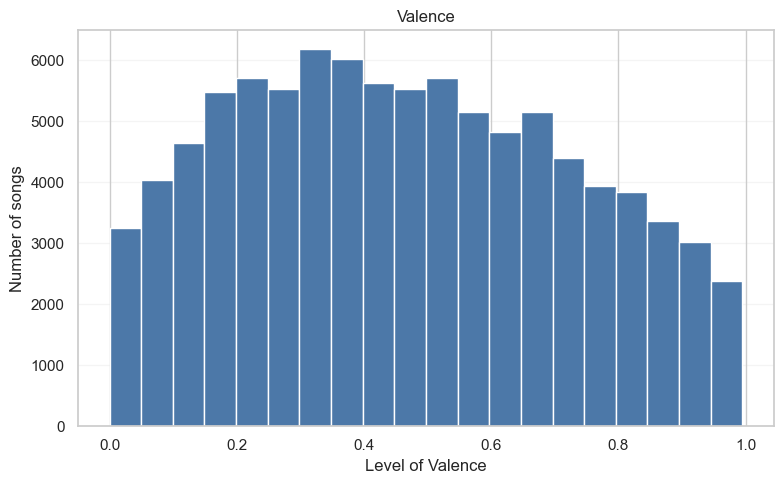

In [193]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df['valence'].dropna(), bins=20, color='#4C78A8', edgecolor='white')
plt.title('Valence')
plt.xlabel('Level of Valence')
plt.ylabel('Number of songs')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

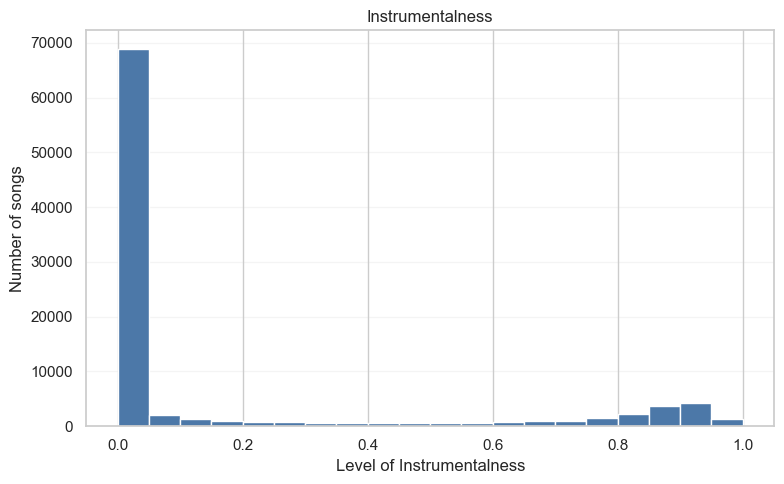

In [194]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df['instrumentalness'].dropna(), bins=20, color='#4C78A8', edgecolor='white')
plt.title('Instrumentalness')
plt.xlabel('Level of Instrumentalness')
plt.ylabel('Number of songs')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

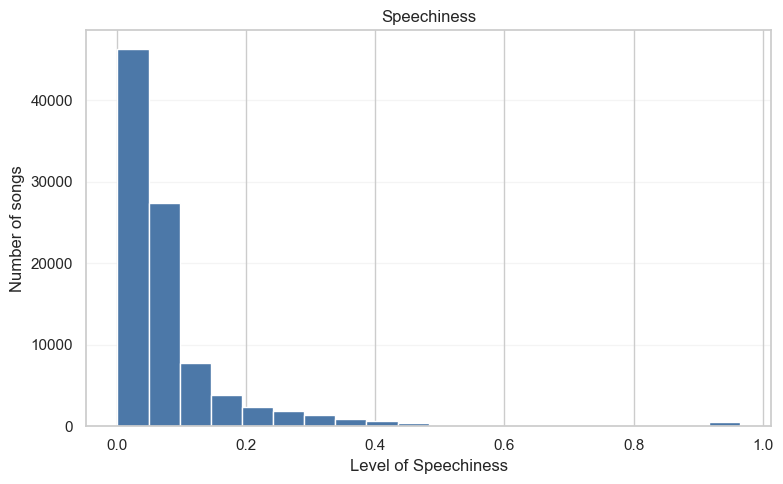

In [195]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df['speechiness'].dropna(), bins=20, color='#4C78A8', edgecolor='white')
plt.title('Speechiness')
plt.xlabel('Level of Speechiness')
plt.ylabel('Number of songs')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

In [196]:
df_just_variables = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])
df_just_variables['explicit'] = df_just_variables['explicit'].astype(int)

In [197]:
df_just_variables['duration_mins'] = df_just_variables['duration_ms'] / 60000

In [198]:
df_just_variables = df_just_variables.drop(columns=['duration_ms'])

In [199]:
df_just_variables = pd.get_dummies(df_just_variables, columns=['key', 'time_signature', 'track_genre'], prefix=['key', 'time_signature', 'track_genre'])

In [200]:
X = df_just_variables.drop(columns=['popularity'])
y = df_just_variables['popularity']
X = sm.add_constant(X)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [202]:
regression = LinearRegression()
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [203]:
y_pred = regression.predict(X_test)

In [204]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [205]:
print("Model Coefficient (Slope):", regression.coef_[0])
print("Model Intercept:", regression.intercept_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Model Coefficient (Slope): 2.638260526428522e-11
Model Intercept: 46.84182066040868
Mean Squared Error: 140.83696714664094
R² Score: 0.5645516638731126


In [206]:
X_numeric = X.astype(float)
y_numeric = y.astype(float)

model = sm.OLS(y_numeric, X_numeric).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     845.8
Date:                Tue, 09 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:09:49   Log-Likelihood:            -3.6575e+05
No. Observations:               93830   AIC:                         7.318e+05
Df Residuals:                   93689   BIC:                         7.331e+05
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

genre_coefficients = model.params[model.params.index.str.startswith('track_genre_')]
genre_coefficients_sorted = genre_coefficients.sort_values(ascending=True)

print("Genre Coefficients (Sorted by Impact on Popularity - Ascending):\n")
genre_coefficients_sorted.head(10)

Genre Coefficients (Sorted by Impact on Popularity - Ascending):



track_genre_romance          -29.975927
track_genre_iranian          -29.534328
track_genre_detroit-techno   -29.369018
track_genre_chicago-house    -28.853572
track_genre_kids             -26.864844
track_genre_grindcore        -25.601461
track_genre_honky-tonk       -25.154958
track_genre_idm              -24.383751
track_genre_breakbeat        -21.152863
track_genre_tango            -20.938129
dtype: float64

In [208]:
genre_correlation = df.groupby('track_genre')['popularity'].mean()
genre_correlation = genre_correlation.sort_values(ascending=False)
genre_correlation.tail(10)

track_genre
breakbeat         20.252769
tango             20.172589
honky-tonk        16.355000
idm               16.004061
kids              15.344330
grindcore         14.669007
chicago-house     12.583162
detroit-techno    11.361680
romance           11.075269
iranian            8.990698
Name: popularity, dtype: float64

C:\Users\favia\AppData\Local\Temp\ipykernel_18796\1697452082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_correlation.sort_values(ascending=False).index, y=genre_correlation.sort_values(ascending=False).values, palette='viridis')


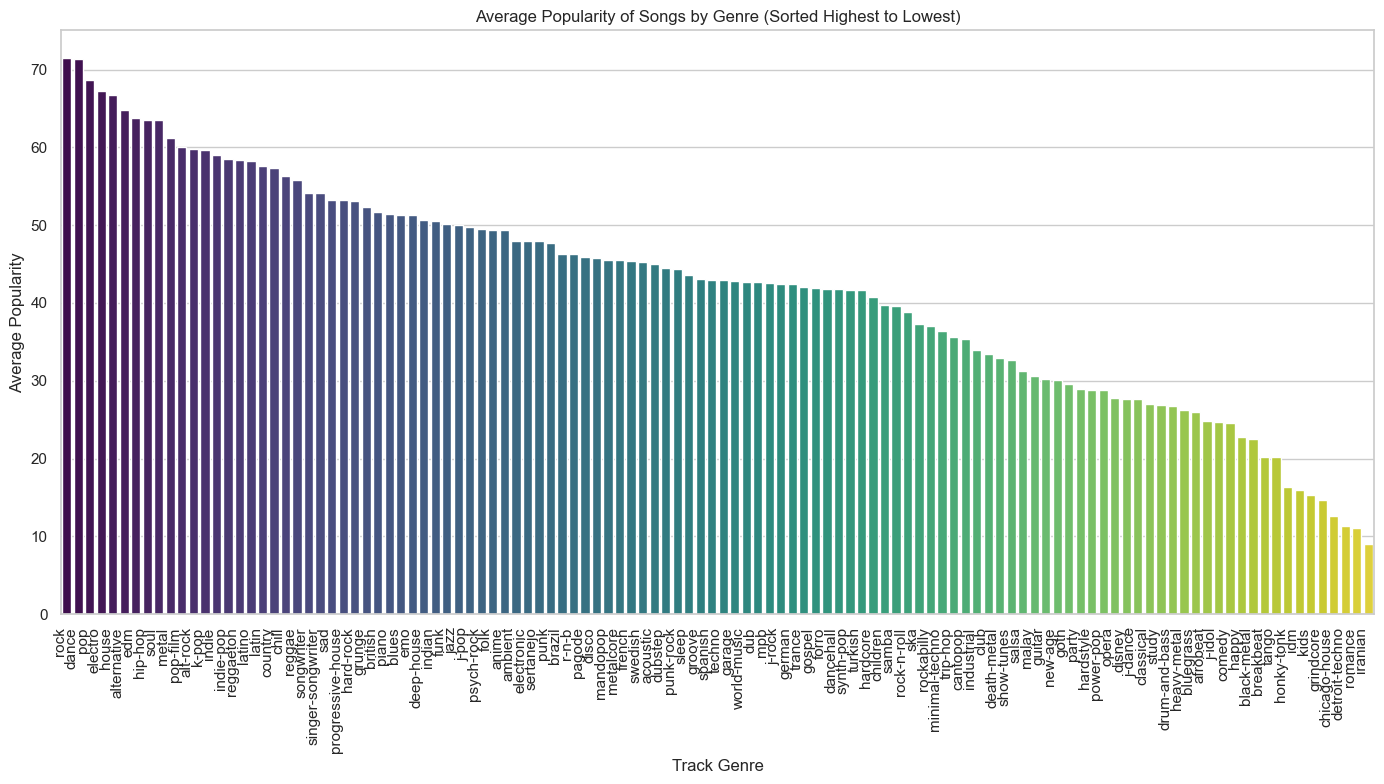

In [209]:
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_correlation.sort_values(ascending=False).index, y=genre_correlation.sort_values(ascending=False).values, palette='viridis')
plt.xlabel('Track Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Songs by Genre (Sorted Highest to Lowest)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
energydf = df[['energy', 'popularity']]
energydf['popularity_bin'] = pd.cut(energydf['popularity'], bins=np.arange(0, 110, 10))
energydf['energy_bin'] = pd.cut(energydf['energy'], bins=np.linspace(0, 1, 11))

C:\Users\favia\AppData\Local\Temp\ipykernel_18796\3501530585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energydf['popularity_bin'] = pd.cut(energydf['popularity'], bins=np.arange(0, 110, 10))
C:\Users\favia\AppData\Local\Temp\ipykernel_18796\3501530585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energydf['energy_bin'] = pd.cut(energydf['energy'], bins=np.linspace(0, 1, 11))


In [212]:
energy_data = energydf.pivot_table(
    index='energy_bin',
    columns='popularity_bin',
    values='popularity',
    aggfunc='count', 
    fill_value=0)

C:\Users\favia\AppData\Local\Temp\ipykernel_18796\2086874598.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  energy_data = energydf.pivot_table(


<Axes: xlabel='popularity_bin', ylabel='energy_bin'>

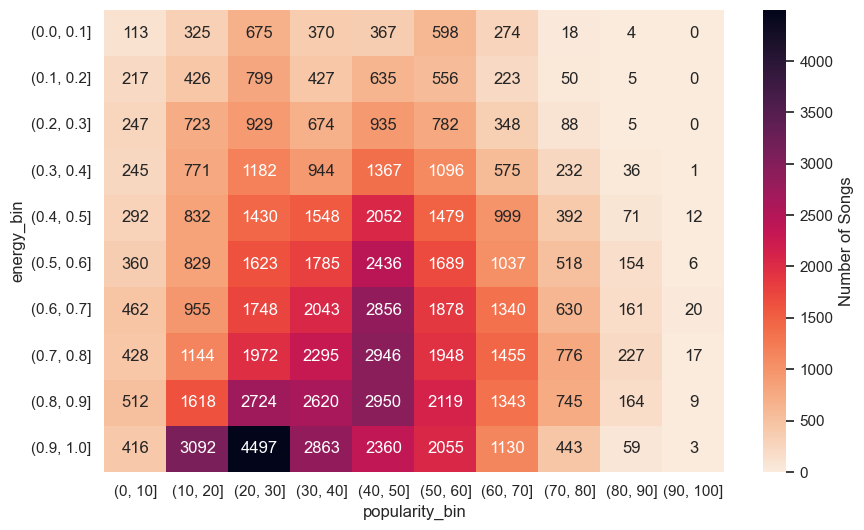

In [213]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    energy_data,
    cmap='rocket_r',
    annot=True,
    fmt='d',
    cbar_kws={'label': 'Number of Songs'})

In [214]:
danceabilitydf = df[['danceability', 'popularity']]

In [215]:
danceabilitydf['popularity_bin'] = pd.cut(danceabilitydf['popularity'], bins=np.arange(0, 110, 10))
danceabilitydf['danceability_bin'] = pd.cut(danceabilitydf['danceability'], bins=np.linspace(0, 1, 11))

C:\Users\favia\AppData\Local\Temp\ipykernel_18796\4117074126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danceabilitydf['popularity_bin'] = pd.cut(danceabilitydf['popularity'], bins=np.arange(0, 110, 10))
C:\Users\favia\AppData\Local\Temp\ipykernel_18796\4117074126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danceabilitydf['danceability_bin'] = pd.cut(danceabilitydf['danceability'], bins=np.linspace(0, 1, 11))


In [216]:
danceability_data = danceabilitydf.pivot_table(
    index='danceability_bin',
    columns='popularity_bin',
    values='popularity',
    aggfunc='count',  # Count of songs in each bin
    fill_value=0)

C:\Users\favia\AppData\Local\Temp\ipykernel_18796\2348903232.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  danceability_data = danceabilitydf.pivot_table(


Text(92.25, 0.5, 'Danceability Bin')

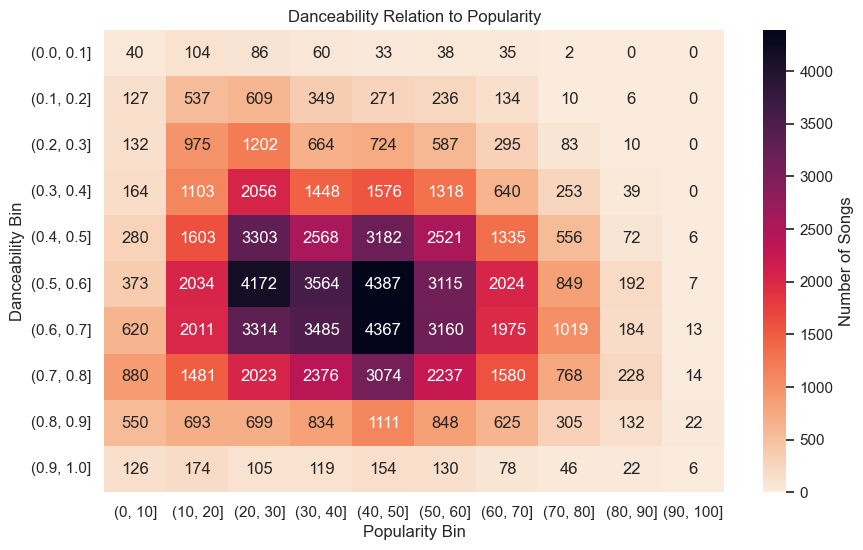

In [217]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    danceability_data,
    cmap='rocket_r',
    annot=True,
    fmt='d',
    cbar_kws={'label': 'Number of Songs'})
plt.title("Danceability Relation to Popularity")
plt.xlabel("Popularity Bin")
plt.ylabel("Danceability Bin")

In [218]:
instrumentalnessdf = df[['instrumentalness', 'popularity']]

In [219]:
instrumentalnessdf['popularity_bin'] = pd.cut(instrumentalnessdf['popularity'], bins=np.arange(0, 110, 10))
instrumentalnessdf['instrumentalness_bin'] = pd.cut(instrumentalnessdf['instrumentalness'], bins=np.linspace(0, 1, 11))

C:\Users\favia\AppData\Local\Temp\ipykernel_18796\2304402451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instrumentalnessdf['popularity_bin'] = pd.cut(instrumentalnessdf['popularity'], bins=np.arange(0, 110, 10))
C:\Users\favia\AppData\Local\Temp\ipykernel_18796\2304402451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instrumentalnessdf['instrumentalness_bin'] = pd.cut(instrumentalnessdf['instrumentalness'], bins=np.linspace(0, 1, 11))


In [220]:
instrumentalness_data = instrumentalnessdf.pivot_table(
    index='instrumentalness_bin',
    columns='popularity_bin',
    values='popularity',
    aggfunc='count', 
    fill_value=0)

C:\Users\favia\AppData\Local\Temp\ipykernel_18796\1121601970.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  instrumentalness_data = instrumentalnessdf.pivot_table(


Text(92.25, 0.5, 'Instrumentalness Bin')

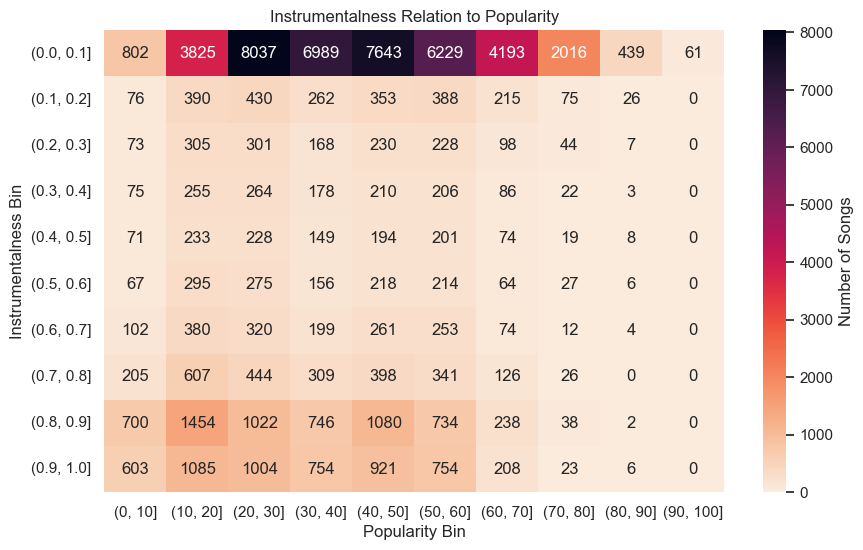

In [221]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    instrumentalness_data,
    cmap='rocket_r',
    annot=True,
    fmt='d',
    cbar_kws={'label': 'Number of Songs'})
plt.title("Instrumentalness Relation to Popularity")
plt.xlabel("Popularity Bin")
plt.ylabel("Instrumentalness Bin")

C:\Users\favia\AppData\Local\Temp\ipykernel_18796\1416950458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speechinessdf['popularity_bin'] = pd.cut(speechinessdf['popularity'], bins=np.arange(0, 110, 10))
C:\Users\favia\AppData\Local\Temp\ipykernel_18796\1416950458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speechinessdf['speechiness_bin'] = pd.cut(speechinessdf['speechiness'], bins=np.linspace(0, 1, 11))
C:\Users\favia\AppData\Local\Temp\ipykernel_18796\1416950458.py:5: FutureWarning: The de

Text(92.25, 0.5, 'Speechiness Bin')

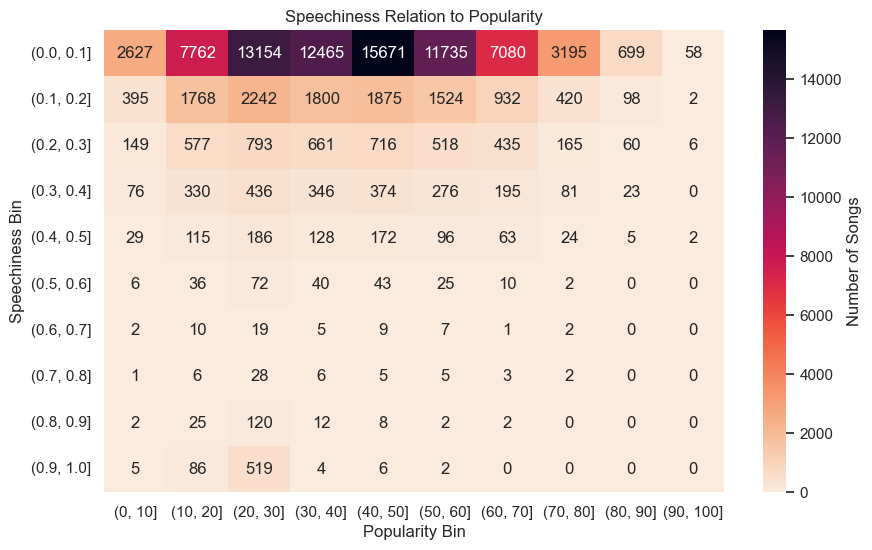

In [222]:
speechinessdf = df[['speechiness', 'popularity']]
speechinessdf['popularity_bin'] = pd.cut(speechinessdf['popularity'], bins=np.arange(0, 110, 10))
speechinessdf['speechiness_bin'] = pd.cut(speechinessdf['speechiness'], bins=np.linspace(0, 1, 11))

speechiness_data = speechinessdf.pivot_table(
    index='speechiness_bin',
    columns='popularity_bin',
    values='popularity',
    aggfunc='count',  
    fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(
    speechiness_data,
    cmap='rocket_r',
    annot=True,
    fmt='d',
    cbar_kws={'label': 'Number of Songs'})
plt.title("Speechiness Relation to Popularity")
plt.xlabel("Popularity Bin")
plt.ylabel("Speechiness Bin")

In [223]:
df = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre','time_signature'])
df['explicit'] = df['explicit'].astype(int)

In [224]:
df['duration_mins'] = df['duration_ms'] / 60000

In [225]:
df = pd.get_dummies(df, columns=['key'], prefix=['key'])

In [226]:
X = df.drop(columns=['popularity', 'duration_ms'])
y = df['popularity']
X = sm.add_constant(X)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [228]:
regression = LinearRegression()
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [229]:
y_pred = regression.predict(X_test)

In [230]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [231]:
print("Model Coefficient (Slope):", regression.coef_[0])
print("Model Intercept:", regression.intercept_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Model Coefficient (Slope): 0.0
Model Intercept: 55.67917753218988
Mean Squared Error: 290.1855412297454
R² Score: 0.10278662160479013


In [232]:
X_numeric = X.astype(float)
y_numeric = y.astype(float)

model = sm.OLS(y_numeric, X_numeric).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     453.9
Date:                Tue, 09 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:09:52   Log-Likelihood:            -3.9913e+05
No. Observations:               93830   AIC:                         7.983e+05
Df Residuals:                   93806   BIC:                         7.985e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               51.4690      0.534  

In [233]:
all_coefficients_sorted = model.params.sort_values(ascending=False)
print("All OLS Model Coefficients (Sorted Ascending):\n")
print(all_coefficients_sorted)

All OLS Model Coefficients (Sorted Ascending):

const               51.469014
danceability         9.058910
key_8                5.634373
key_3                5.294490
explicit             4.965944
key_11               4.744780
key_6                4.715304
key_5                4.533517
key_1                4.343410
key_4                3.929886
key_10               3.895723
key_2                3.871765
key_0                3.786797
key_9                3.656006
key_7                3.062964
loudness             0.295064
tempo               -0.010779
duration_mins       -0.496790
mode                -0.781053
acousticness        -2.635144
liveness            -3.481533
valence             -6.919656
energy              -8.851564
instrumentalness   -12.964466
speechiness        -22.411681
dtype: float64


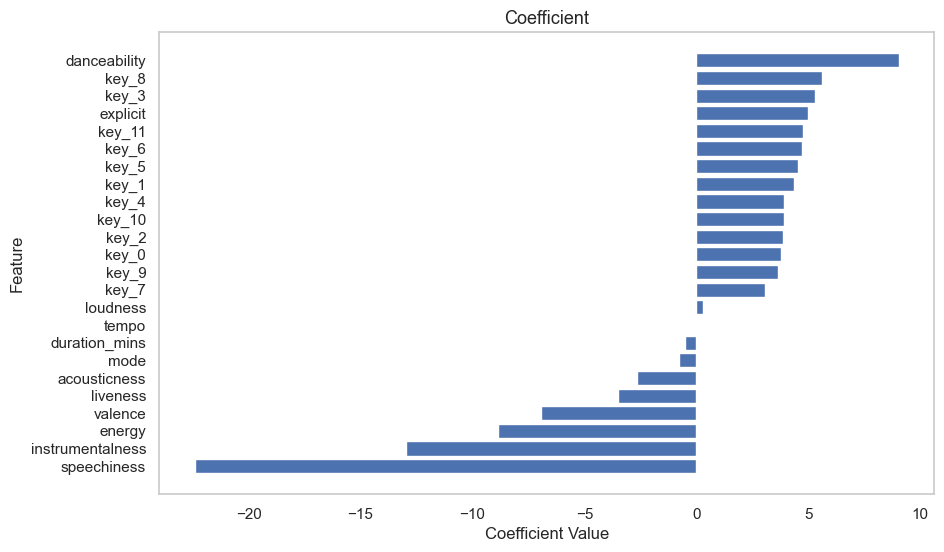

In [234]:
coef = model.params.copy()

coef = coef.drop(labels=[c for c in coef.index if c.lower() in ['const', 'intercept']],
                 errors='ignore')

coef_sorted = coef.sort_values(ascending=False)
to_plot = coef_sorted.head(N) if isinstance(N, int) else coef_sorted


plt.figure(figsize=(10, 6))
bars = plt.barh(to_plot.index, to_plot.values)
plt.gca().invert_yaxis() 
plt.title("Coefficient", fontsize=13)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(False)
plt.show()
